In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('data/demonstration_center_out.pkl', 'rb') as fp:
    episodes = pickle.load(fp)

In [3]:
neutral_position = np.array([3.84396701e-02, -2.19447219e-12, 1.97400143e-01])

In [4]:
episodes_to_explore = episodes[:100]

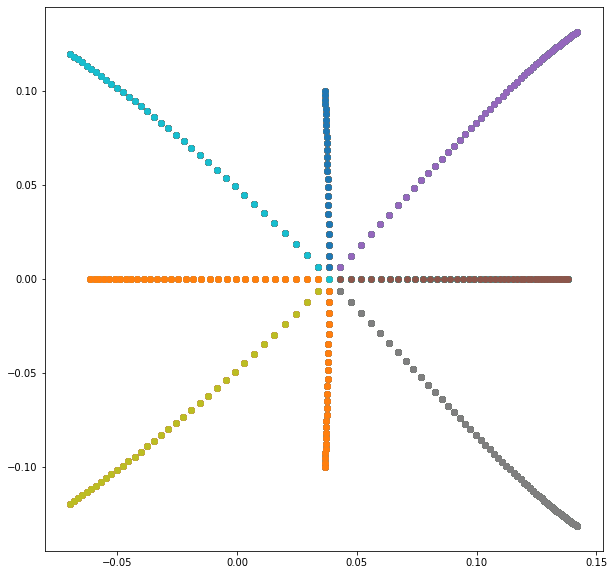

In [5]:
fig = plt.figure(figsize=(10, 10))

for episode in episodes_to_explore:
    ee_positions = np.array(
        [step['previous_observation']['achieved_goal'] for step in episode])
    plt.scatter(ee_positions[:, 0], ee_positions[:, 1])
    
plt.show()

In [6]:
goals = set(tuple(episode[0]['previous_observation']['desired_goal']) for episode in episodes_to_explore)
goals = sorted(list(goals), key=lambda g: (-g[1], g[0]))

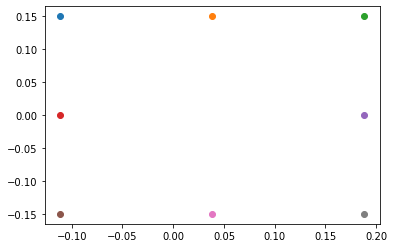

In [7]:
for goal in goals:
    plt.scatter(goal[0], goal[1])

In [8]:
from collections import defaultdict

episodes_by_goal = defaultdict(list)
for episode in episodes_to_explore:
    goal = tuple(episode[0]['previous_observation']['desired_goal'])
    episodes_by_goal[goal].append(episode)

In [9]:
goals

[(-0.1115603298898189, 0.14999999999780553, 0.19740014349589585),
 (0.0384396701101811, 0.14999999999780553, 0.19740014349589585),
 (0.1884396701101811, 0.14999999999780553, 0.19740014349589585),
 (-0.1115603298898189, -2.194472194883551e-12, 0.19740014349589585),
 (0.1884396701101811, -2.194472194883551e-12, 0.19740014349589585),
 (-0.1115603298898189, -0.15000000000219446, 0.19740014349589585),
 (0.0384396701101811, -0.15000000000219446, 0.19740014349589585),
 (0.1884396701101811, -0.15000000000219446, 0.19740014349589585)]

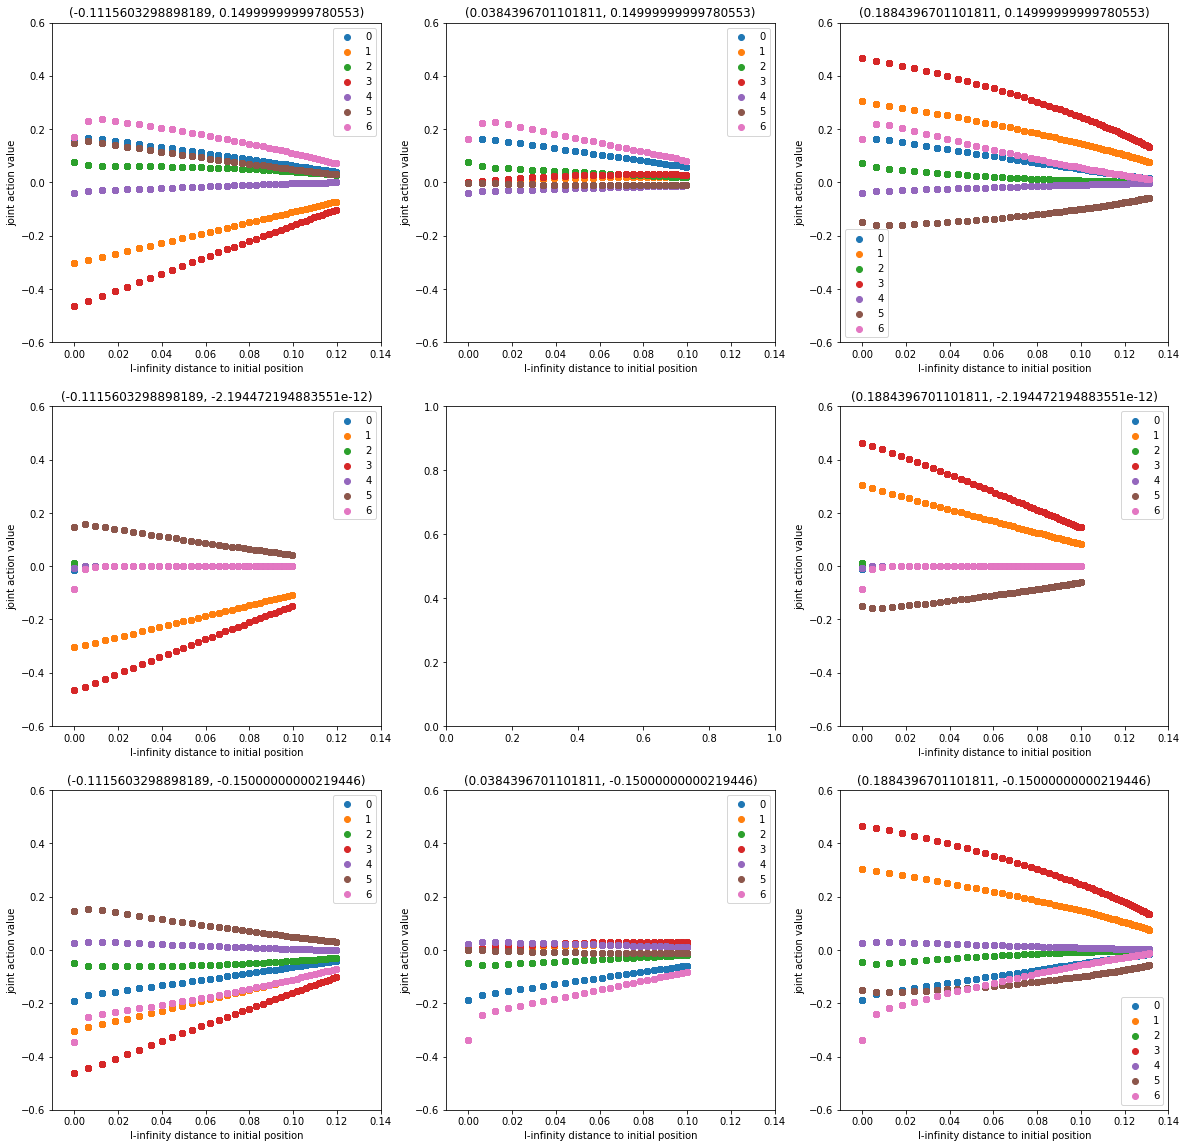

In [10]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

for i, goal in enumerate(goals):
    if i >= 4:
        i += 1 # offset for visualization
    
    for joint_id in range(7):
        axs[i // 3, i % 3].scatter(
            [step['radius'] for episode in episodes_by_goal[goal] for step in episode], 
            [step['action_joints'][joint_id] for episode in episodes_by_goal[goal] for step in episode], 
            label=joint_id)
        
    axs[i // 3, i % 3].legend()
    axs[i // 3, i % 3].set_title(goal[:2])
    axs[i // 3, i % 3].set_xlabel('l-infinity distance to initial position')
    axs[i // 3, i % 3].set_ylabel('joint action value')
    axs[i // 3, i % 3].set_xlim(-.01, .14)
    axs[i // 3, i % 3].set_ylim(-.6, .6)

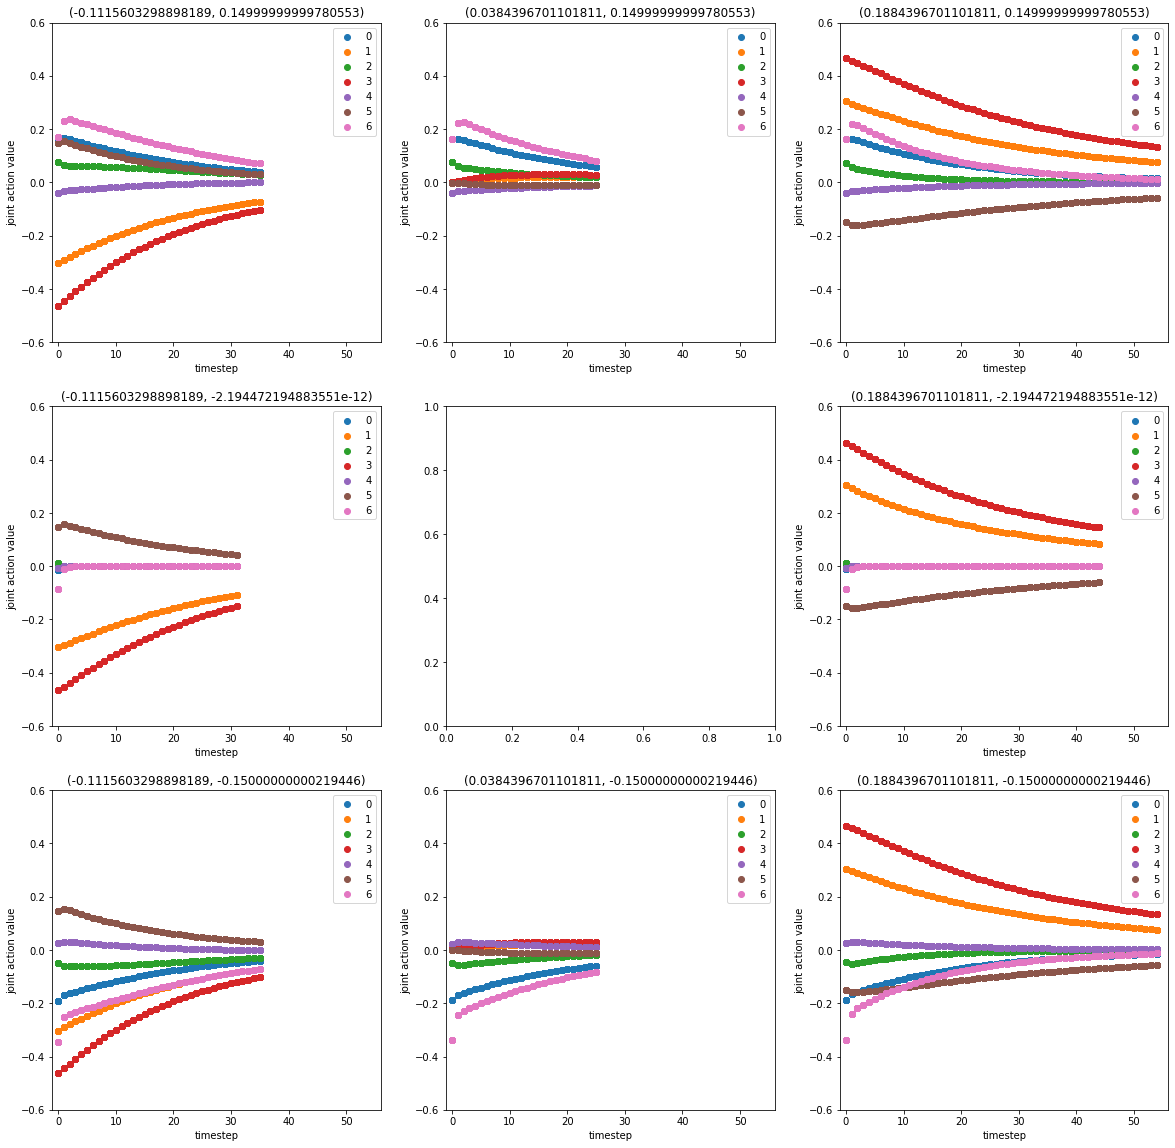

In [11]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

for i, goal in enumerate(goals):
    if i >= 4:
        i += 1 # offset for visualization
    
    for joint_id in range(7):
        axs[i // 3, i % 3].scatter(
            [i for episode in episodes_by_goal[goal] for i, _ in enumerate(episode)], 
            [step['action_joints'][joint_id] for episode in episodes_by_goal[goal] for step in episode], 
            label=joint_id)
        
    axs[i // 3, i % 3].legend()
    axs[i // 3, i % 3].set_title(goal[:2])
    axs[i // 3, i % 3].set_xlabel('timestep')
    axs[i // 3, i % 3].set_ylabel('joint action value')
    axs[i // 3, i % 3].set_xlim(-1, 56)
    axs[i // 3, i % 3].set_ylim(-.6, .6)

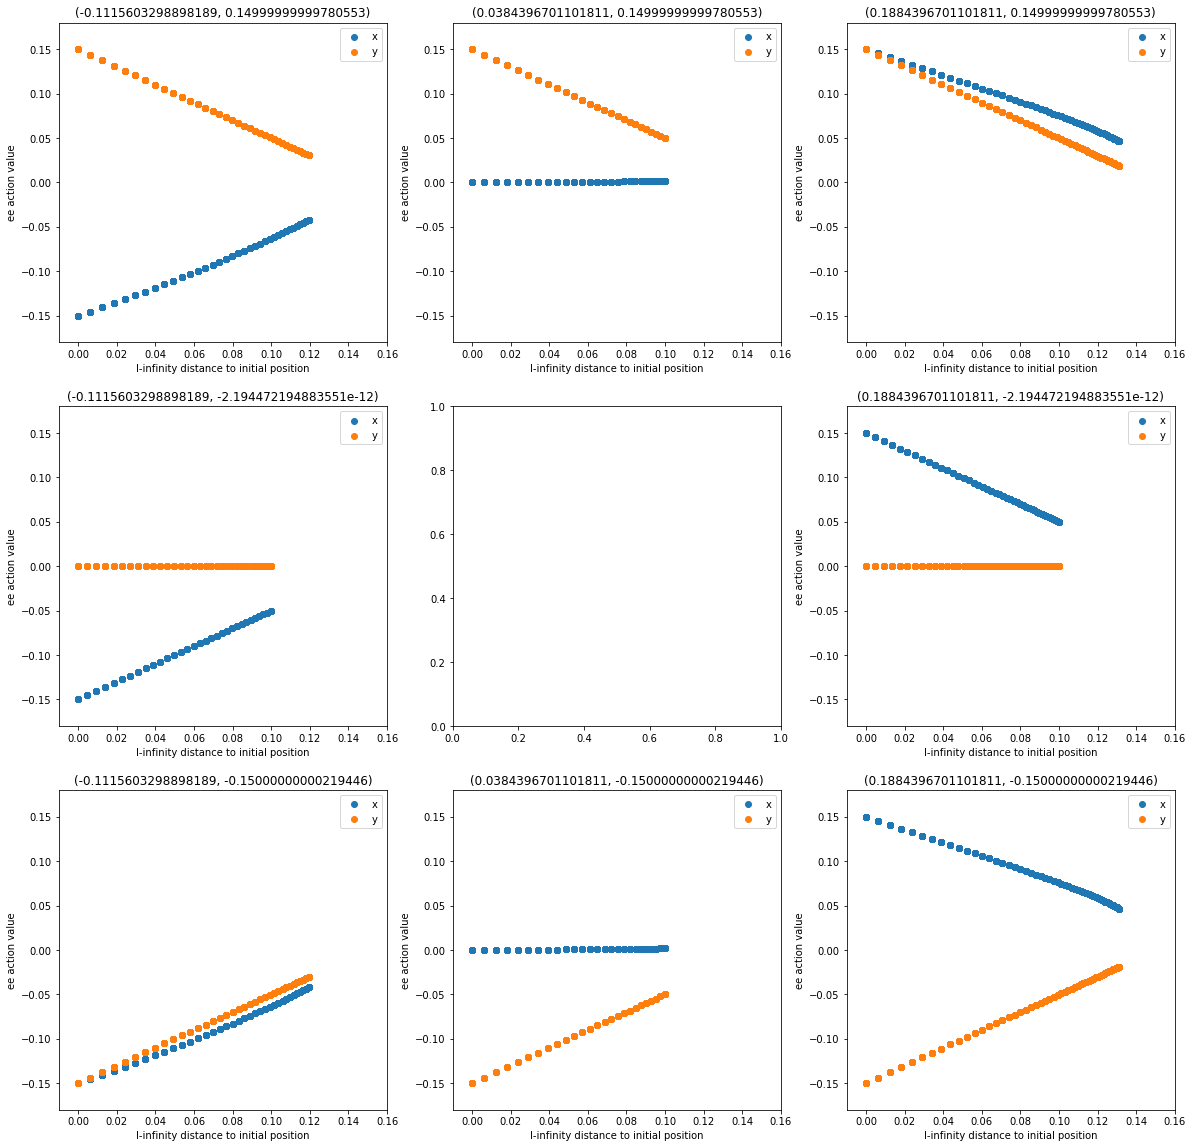

In [12]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

for i, goal in enumerate(goals):
    if i >= 4:
        i += 1 # offset for visualization
    
    axs[i // 3, i % 3].scatter(
        [step['radius'] for episode in episodes_by_goal[goal] for step in episode], 
        [step['action_ee'][0] for episode in episodes_by_goal[goal] for step in episode], 
        label='x')
    axs[i // 3, i % 3].scatter(
        [step['radius'] for episode in episodes_by_goal[goal] for step in episode], 
        [step['action_ee'][1] for episode in episodes_by_goal[goal] for step in episode], 
        label='y')
        
    axs[i // 3, i % 3].legend()
    axs[i // 3, i % 3].set_title(goal[:2])
    axs[i // 3, i % 3].set_xlabel('l-infinity distance to initial position')
    axs[i // 3, i % 3].set_ylabel('ee action value')
    axs[i // 3, i % 3].set_xlim(-.01, .16)
    axs[i // 3, i % 3].set_ylim(-.18, .18)

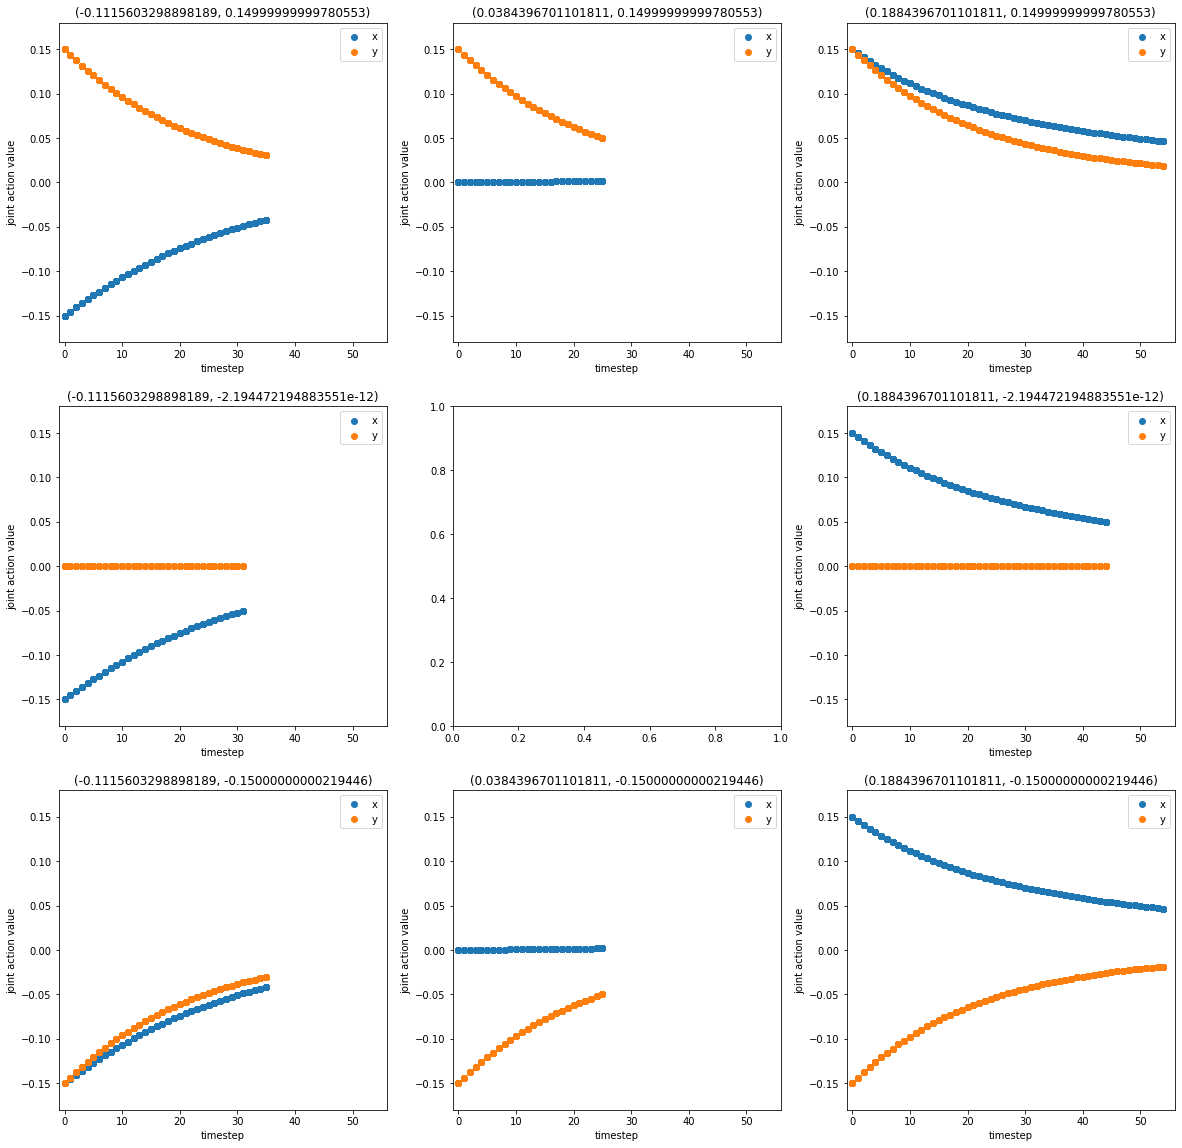

In [13]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

for i, goal in enumerate(goals):
    if i >= 4:
        i += 1 # offset for visualization
    
    axs[i // 3, i % 3].scatter(
        [i for episode in episodes_by_goal[goal] for i, _ in enumerate(episode)], 
        [step['action_ee'][0] for episode in episodes_by_goal[goal] for step in episode], 
        label='x')
    axs[i // 3, i % 3].scatter(
        [i for episode in episodes_by_goal[goal] for i, _ in enumerate(episode)], 
        [step['action_ee'][1] for episode in episodes_by_goal[goal] for step in episode], 
        label='y')
        
    axs[i // 3, i % 3].legend()
    axs[i // 3, i % 3].set_title(goal[:2])
    axs[i // 3, i % 3].set_xlabel('timestep')
    axs[i // 3, i % 3].set_ylabel('joint action value')
    axs[i // 3, i % 3].set_xlim(-1, 56)
    axs[i // 3, i % 3].set_ylim(-.18, .18)

In [14]:
actions_joints = np.array([step['action_joints'] for epi in episodes for step in epi])

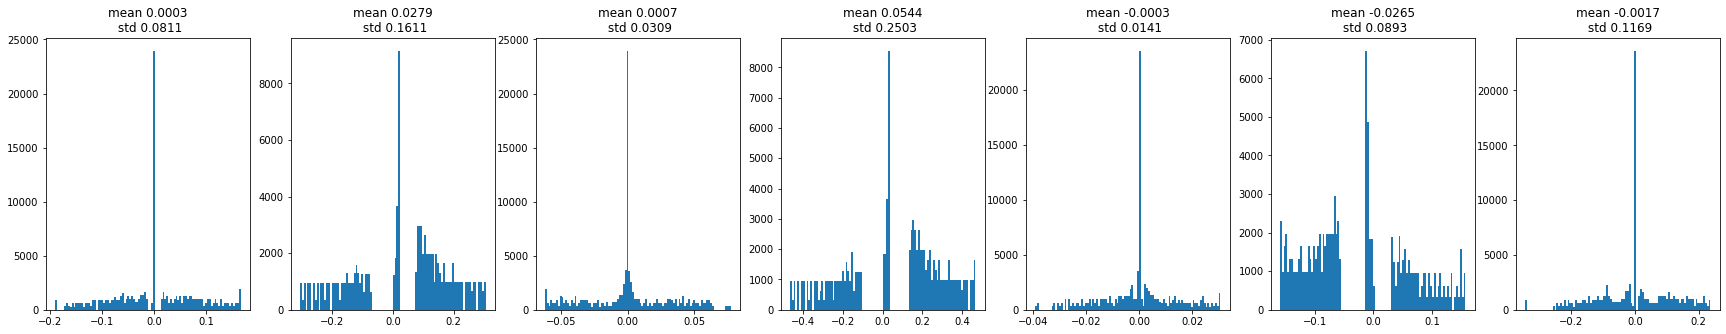

In [15]:
fig, axs = plt.subplots(1, 7, figsize=(30, 5))
for i in range(7):
    axs[i].hist(actions_joints[:, i], bins=100)
    mu = np.around(np.mean(actions_joints[:, i]), 4)
    sig = np.around(np.std(actions_joints[:, i]), 4)
    axs[i].set_title(f'mean {mu}\n std {sig}')

In [16]:
# Compare this with the output of the trained “constant” decoders

[-0.00337357,  0.00809585,  0.00038384,  0.01979752,  0.00034392, -0.01047308, -0.01087594]
[ 0.00094016,  0.00906211,  0.00278589,  0.02125011, -0.00115633, -0.01143865, -0.00426206]

[0.00094016,
 0.00906211,
 0.00278589,
 0.02125011,
 -0.00115633,
 -0.01143865,
 -0.00426206]

In [17]:
actions_joints_half_radius = np.array([step['action_joints'] for epi in episodes for step in epi if step['radius'] < 0.06])

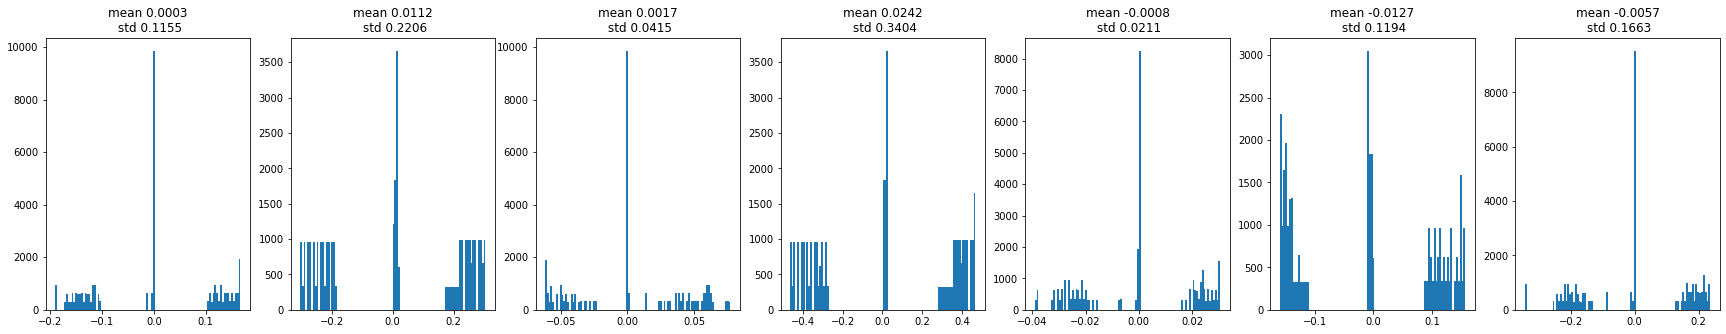

In [18]:
fig, axs = plt.subplots(1, 7, figsize=(30, 5))
for i in range(7):
    axs[i].hist(actions_joints_half_radius[:, i], bins=100)
    mu = np.around(np.mean(actions_joints_half_radius[:, i]), 4)
    sig = np.around(np.std(actions_joints_half_radius[:, i]), 4)
    axs[i].set_title(f'mean {mu}\n std {sig}')

In [19]:
# Compare this with the output of the trained “constant” decoders


[ 0.00094016,  0.00906211,  0.00278589,  0.02125011, -0.00115633, -0.01143865, -0.00426206]
[-0.00337357,  0.00809585,  0.00038384,  0.01979752,  0.00034392, -0.01047308, -0.01087594]

[-0.00337357,
 0.00809585,
 0.00038384,
 0.01979752,
 0.00034392,
 -0.01047308,
 -0.01087594]

In [20]:
actions_joints_qtr_radius = np.array([step['action_joints'] for epi in episodes for step in epi if step['radius'] < 0.03])

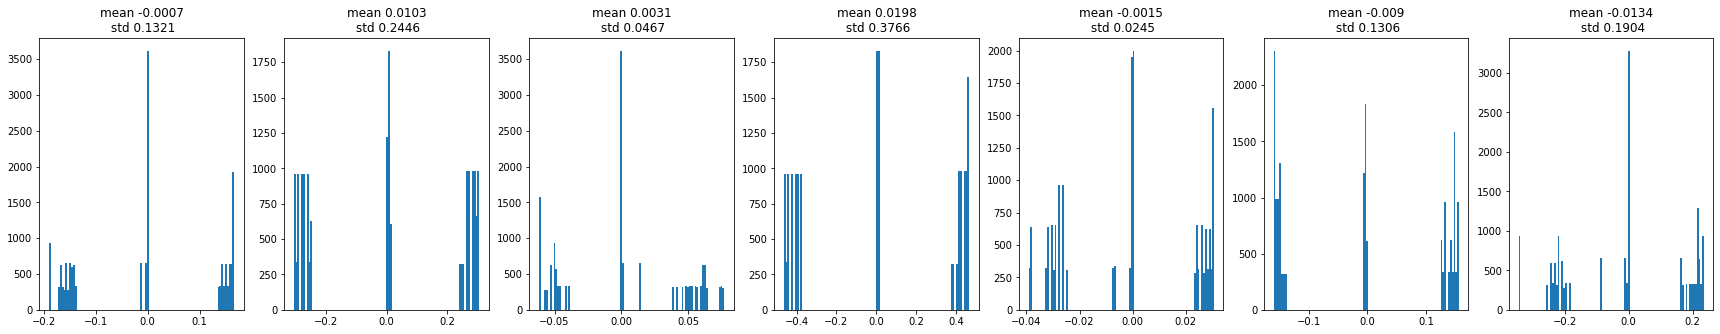

In [21]:
fig, axs = plt.subplots(1, 7, figsize=(30, 5))
for i in range(7):
    axs[i].hist(actions_joints_qtr_radius[:, i], bins=100)
    mu = np.around(np.mean(actions_joints_qtr_radius[:, i]), 4)
    sig = np.around(np.std(actions_joints_qtr_radius[:, i]), 4)
    axs[i].set_title(f'mean {mu}\n std {sig}')

In [22]:
# Compare this with the output of the trained “constant” decoders

[-4.0747300e-03,  1.1267171e-02,  1.3626739e-03,  2.1021940e-02, 5.5558885e-05, -9.2505161e-03, -1.8031666e-02]
[-0.00343556,  0.01431457,  0.00260765,  0.02479776, -0.00166767, -0.01153329, -0.01777948]

[-0.00343556,
 0.01431457,
 0.00260765,
 0.02479776,
 -0.00166767,
 -0.01153329,
 -0.01777948]